<h2 align="right">Case Study 1</h2> 
<b><u><h1 align="center">Case study on Presentation of data</h1></u></b><br/>
<h2><u>Objectives :</u></h2><br>
Do the following operations on ‘cars_data’ dataset:
<ol>
<li>Read the dataset to the python environment.</li>
<li>Check for the null values present in the dataset.</li>
<li>Plot a bar graph of male vs female buyers participated in the sales.</li>
<li>Find the top 5 cars based on their sales price.</li>
<li>Find the least 5 cars based on their Resell price.</li>
</ol>


In [128]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: inset;
    }
</style>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# 1. Read the dataset to the python environment.

In [133]:
df = pd.read_csv('cars_data.csv')
df.head()

,Make,Model,Nickname,Car Gender,Buyer Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Purchase Date,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
0,Suzuki,Vitara,Philippine,Female,Female,51,User-friendly,Belgium,Antwerpen,51.247239,4.440346,Yellow,False,19/07/2009,54806.14,0.2467,33858.32,0.13,200.9,11.5
1,Honda,S2000,Henrik,Male,Male,30,analyzing,China,Jinhu,33.025433,119.020584,Crimson,False,26/10/2015,51826.30,0.3147,2989.28,0.02,158.5,8.8
2,BMW,Z4,Lebbie,Male,Female,54,software,China,Gemo,30.916207,121.677640,Khaki,False,28/03/2010,82929.14,0.5414,35049.16,0.24,149.5,14.4
3,Toyota,Tacoma,Jefferey,Female,Male,68,monitoring,Portugal,Queluz de Baixo,38.745168,-9.267087,Puce,False,07/05/2008,56928.66,0.0850,8236.15,0.20,153.3,11.5
4,Ford,Festiva,Glendon,Female,Male,70,Sharable,Latvia,Jaunpils,56.729980,23.016588,Yellow,False,01/06/2008,77201.26,0.1642,32765.76,0.18,122.0,14.9


# 2.Check for the null values present in the dataset.

In [134]:
df.isnull().values.any()

False

# 3.Plot a bar graph of male vs female buyers participated in the sales.

### PLOT 1 : Gender vs Sales

C:\Users\Thesni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


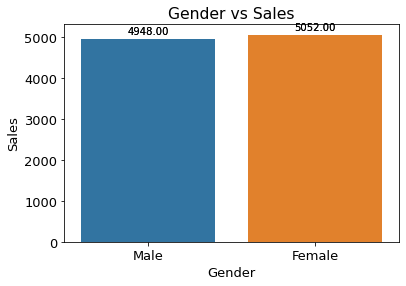

In [135]:
x=['Male','Female']
y=[len(df[df["Buyer Gender"]=='Male']),len(df[df["Buyer Gender"]=='Female'])]
plt.bar(x,y)
plots = sns.barplot(x, y, data=df)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Gender vs Sales")
plt.xlabel("Gender")
plt.ylabel("Sales")
plt.show()

<h5><u>INSIGHTS</u></h5><br>
<li>Females participated in the sales:5052</li>
<li>Males participated in the sales:4948</li>
<li>Number of Females participated in the sales is higher than the number of Males.</li><br>

### PLOT 2 : Male Vs Female buyers participated in the sales from year 2001 to 2021

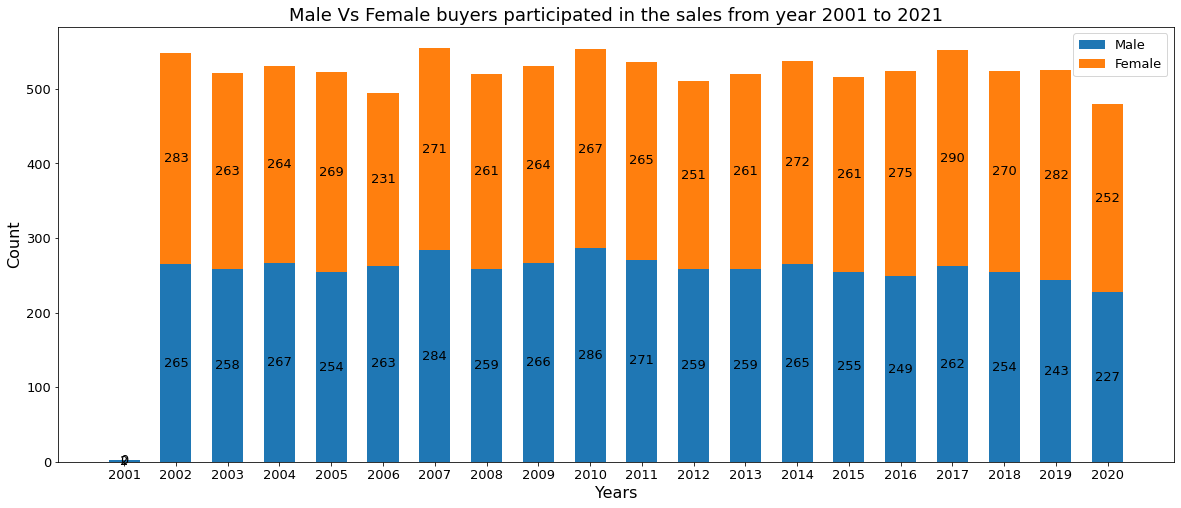

In [136]:
df['year'] = pd.DatetimeIndex(df['Purchase Date']).year
x=df['year'].unique()
newdf = pd.DataFrame()
for i in x:
    df1=df[df['year'] == i]
    m=len(df1[df1['Buyer Gender']=='Male'])
    f=len(df1[df1['Buyer Gender']=='Female'])
    df2 = {'Female': f,'Male': m, 'year': i }
    newdf=newdf.append(df2, ignore_index = True)
newdf['year'] = newdf['year'].astype('int64')
newdf = newdf.drop_duplicates()  
year=newdf['year']
males=newdf['Male']
females=newdf['Female']
width = 0.6       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(20, 8))
p1=ax.bar(year, males, width, label='Male')
p2=ax.bar(year, females, width, bottom=males,label='Female')

ax.set_xticks(year)

ax.set_ylabel('Count',fontsize=16)
ax.set_xlabel('Years',fontsize=16)
ax.set_title('Male Vs Female buyers participated in the sales from year 2001 to 2021',fontsize=18)
ax.legend()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.rcParams['font.size'] = '13'
plt.show()

<h5><u>INSIGHTS</u></h5><br>
<li>Number of male and female buyers of each year from 2001 to 2020 can be seen.</li>
<li>The year with least sales is 2001.</li>
<li>The year in which sales are highest is 2010.</li>
<li>Year 2010 have the greater number of male buyers than that of other years.</li>
<li>Coming to 2017 the number of female buyers increased, it is high compared to male and female buyers of other years.</li>

# 4. Find the top 5 cars based on their sales price. 

In [137]:
lsdf=df.nlargest(5,'Sale Price')
lsdf[['Make','Model','Sale Price']]

,Make,Model,Sale Price
5984,Volkswagen,Jetta III,99997.65
1270,Audi,A6,99991.91
3460,Lexus,LX,99983.38
9032,Mazda,MX-6,99978.17
302,Lexus,ES,99973.44


<p>So the Top 5 cars Based on their Sales Price from the dataset are:</p>
<li>Volkswagen's Jetta III </li>
<li>Audi's A6</li>
<li>Lexus's LX</li>
<li>Mazda's MX-6</li>
<li>Lexus's ES</li>

# 5. Find the least 5 cars based on their Resell price. 

In [138]:
srdf=df.nsmallest(5,'Resell Price')
srdf[['Make','Model','Resell Price']]

,Make,Model,Resell Price
2446,Chevrolet,1500,2000.84
4933,GMC,Savana 1500,2005.44
566,Jaguar,XF,2014.09
2538,Mitsubishi,3000GT,2017.24
5869,Infiniti,G37,2017.83


<p>The least 5 cars Based on their Resell price from the dataset are:</p>
<li>Chevrolet's 1500 model</li>
<li>GMC's Savana 1500</li>
<li>Jaguar's XF</li>
<li>Mitsubishi's 3000GT</li>
<li>Infiniti's G37</li>